* 1. Read the data as a Pandas DataFrame and display the first and last few rows.


In [65]:
import pandas as pd

In [89]:
df = pd.read_csv('C:/Users/CELESTE/CodeOp/Module_6_DPT15/decision-science-celefigs/data/webdata/experiment_data.csv')

In [82]:
print("First few rows:")
print(df.head(5))
print("\nLast few rows:")
print(df.tail(5))

First few rows:
          Date  Pageviews  Clicks  Enrollments  Payments
0  Sat, Oct 11       7716     686        105.0      34.0
1  Sun, Oct 12       9288     785        116.0      91.0
2  Mon, Oct 13      10480     884        145.0      79.0
3  Tue, Oct 14       9867     827        138.0      92.0
4  Wed, Oct 15       9793     832        140.0      94.0

Last few rows:
           Date  Pageviews  Clicks  Enrollments  Payments
32  Wed, Nov 12      10042     802          NaN       NaN
33  Thu, Nov 13       9721     829          NaN       NaN
34  Fri, Nov 14       9304     770          NaN       NaN
35  Sat, Nov 15       8668     724          NaN       NaN
36  Sun, Nov 16       8988     710          NaN       NaN


* 2. Display the dataset dimensions (rows and columns).

In [68]:
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (37, 5)


* 3. Display the data types of the columns and summarize how many columns are categorical and numerical types.

In [69]:
print("Data types of columns:")
print()
print(df.dtypes)

Data types of columns:

Date            object
Pageviews        int64
Clicks           int64
Enrollments    float64
Payments       float64
dtype: object


In [70]:
categorical_cols = df.select_dtypes(include = ['object']).shape[1]
numerical_cols = df.select_dtypes(include = ['int', 'float']).shape[1]

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")



numeric_cols = df.select_dtypes(include=['int', 'float']).columns
print(numeric_cols)

Categorical columns: 1
Numerical columns: 4
Index(['Pageviews', 'Clicks', 'Enrollments', 'Payments'], dtype='object')


In [72]:
# Calcular estadísticas descriptivas para columnas numéricas
numeric_stats = df[['Pageviews', 'Clicks', 'Enrollments', 'Payments']].describe()
print(numeric_stats)

          Pageviews      Clicks  Enrollments    Payments
count     37.000000   37.000000    23.000000   23.000000
mean    9315.135135  765.540541   148.826087   84.565217
std      708.070781   64.578374    33.234227   23.060841
min     7664.000000  642.000000    94.000000   34.000000
25%     8881.000000  722.000000   127.000000   69.000000
50%     9359.000000  770.000000   142.000000   91.000000
75%     9737.000000  827.000000   172.000000   99.000000
max    10551.000000  884.000000   213.000000  123.000000


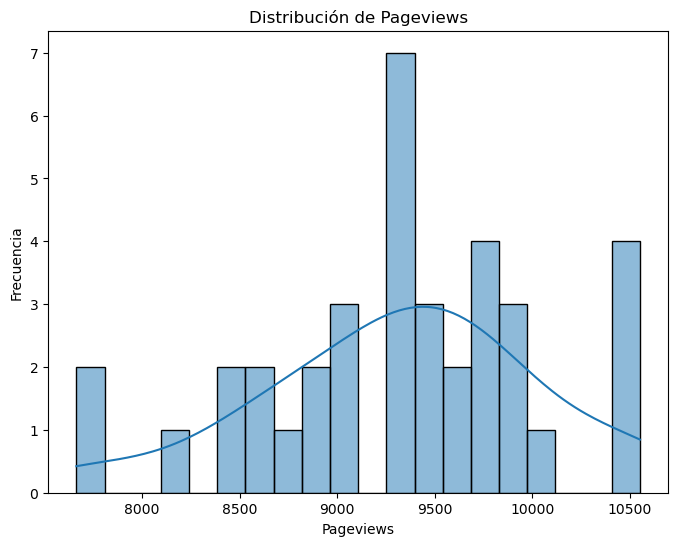

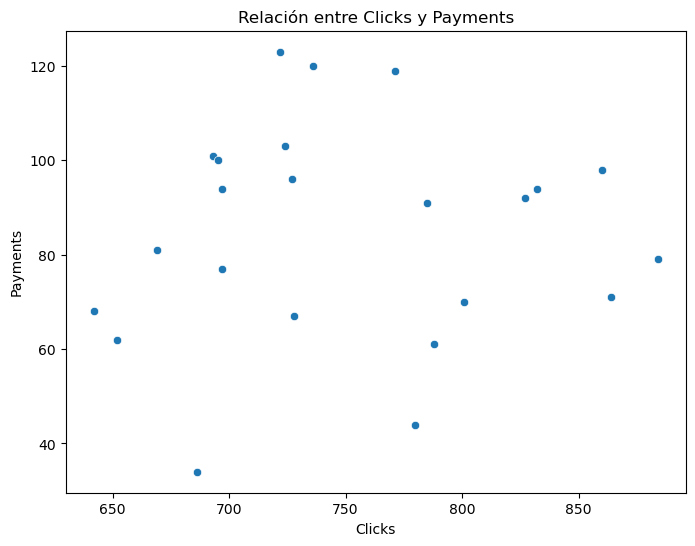

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Pageviews
plt.figure(figsize=(8, 6))
sns.histplot(df['Pageviews'], bins=20, kde=True)
plt.title('Distribución de Pageviews')
plt.xlabel('Pageviews')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de dispersión de Clicks vs Payments
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Clicks', y='Payments')
plt.title('Relación entre Clicks y Payments')
plt.xlabel('Clicks')
plt.ylabel('Payments')
plt.show()


In [74]:
# Calcular la media de Pageviews
mean_pageviews = df['Pageviews'].mean()
print(f"Media de Pageviews: {mean_pageviews}")


Media de Pageviews: 9315.135135135135


In [90]:
from datetime import datetime
import calendar

#df['Date'] = pd.to_datetime(df['Date'], format = '%a, %b %d')


def convert_date(date_str):
    date_format = '%a, %b %d'
    date_object = datetime.strptime(date_str, date_format)
    # Ajustar el año deseado (por ejemplo, 2020)
    desired_year = 2020
    return date_object.replace(year=desired_year)

# Aplicar la función a toda la columna 'Date'
df['Date'] = df['Date'].apply(convert_date)

In [91]:
df.dtypes

Date           datetime64[ns]
Pageviews               int64
Clicks                  int64
Enrollments           float64
Payments              float64
dtype: object

* 4. Handle missing data.

In [92]:
# check missing data
missing_data = df.isnull().sum()
print(missing_data)

Date            0
Pageviews       0
Clicks          0
Enrollments    14
Payments       14
dtype: int64


In [93]:
#or 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         37 non-null     datetime64[ns]
 1   Pageviews    37 non-null     int64         
 2   Clicks       37 non-null     int64         
 3   Enrollments  23 non-null     float64       
 4   Payments     23 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.6 KB
None


In [97]:
# Handle missing data (example: fill NaN values with mean)
df.fillna(df.mean(), inplace=True)

In [98]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         37 non-null     datetime64[ns]
 1   Pageviews    37 non-null     int64         
 2   Clicks       37 non-null     int64         
 3   Enrollments  37 non-null     float64       
 4   Payments     37 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.6 KB
None


In [99]:
missing_data = df.isnull().sum()
print(missing_data)

Date           0
Pageviews      0
Clicks         0
Enrollments    0
Payments       0
dtype: int64
